# Nov 8 | Plotting netCDF datasets: How to make pretty maps
![image](https://cdn.zmescience.com/wp-content/uploads/2014/10/GRAVITY_map_ocean.jpg)

Adapted from [these](http://joehamman.com/2013/10/12/plotting-netCDF-data-with-Python/) [tutorials](http://aosc.umd.edu/~cmartin/python/examples/netcdf_example1.html). They're both very useful but go into a little more detail than we need for now.
The tools we're going to use are the **matplotlib**, **netCDF4**, **numpy** and **Basemap** tools.
- **matplotlib**: This is a free tool that's used to make cool and beautiful plots, maps and other visuals. Here are some examples: <img src="https://upload.wikimedia.org/wikipedia/commons/c/ca/Mpl_screenshot_figures_and_code.png" width="600">
- **netCDF4**: You've seen this package last week! We use it to access our data.
- **numpy**: Again, an old friend (enemy?). Here, we'll use it to change or get data from arrays. 
- **Basemap**: This is a tool from matplotlib that lets us make cool maps easily! <img src="https://peak5390.files.wordpress.com/2012/12/screenshot-figure-1.png" width = "600">

## The basic steps to follow:
- First, we will open our dataset, and find the latitude and longitude values. These will be our "x-y axes" for our map.
- Then, we'll also find our sea-surface height data. These are our "z" values for our map.
- Next, we will initialize a map using Basemap, and add in some details, like continents and colors
- Finally, we will plot our data on our map

### Start off by importing the libraries and tools we want

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

%config InlineBackend.close_figures=False # keep figures open and keep updating as we go

## Next, we'll open our netCDF file using the Dataset function. 
The file we want to load in is called halloween.nc. You'll find it in your GitHub folder

In [2]:
dataset = Dataset("/Users/katyabbott/Documents/eddy/netCDF_practice.nc")

### Let's investigate this dataset a little more. First, we'll look at its attributes.
Recall: **dataset.ncattrs()** will show us the names of the attributes.

In [3]:
dataset.ncattrs()

['description', 'history', 'source']

In [4]:
print(dataset.description)
print(dataset.history)
print(dataset.source)

netCDF practice for interns
Created Wed Oct 31 18:10:07 2018
netCDF4 python module tutorial


### OK, nothing too interesting. What about the dimensions and variables?


In [5]:
#Dimensions
print(dataset.dimensions.keys())

odict_keys(['lat', 'lon'])


In [6]:
#Variables
print(dataset.variables)

OrderedDict([('lat', <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    units: degrees_north
unlimited dimensions: 
current shape = (225,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lon', <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees east
unlimited dimensions: 
current shape = (225,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('height', <class 'netCDF4._netCDF4.Variable'>
float32 height(lat, lon)
    units: m
unlimited dimensions: 
current shape = (225, 225)
filling on, default _FillValue of 9.969209968386869e+36 used
)])


So, it looks like our coordinate variables/dimensions are latitude and longitude. The main variable that we'll be plotting is height. Height is a function of latitude and longitude, and this is shown in the netCDF file. 

One of the great things about netCDF files is that they're ordered. This means that our data is stored in the same order every time, and always reflects rows and columns of latitude and longitude. Now, let's create new variables in Python that contain our latitude, longitude and height values.

In [7]:
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
height = dataset.variables['height'][:]

If we want to see what this data looks like, we can do so.

In [8]:
print("lat = ", lat)

lat =  [25.       25.089285 25.178572 25.267857 25.357143 25.446428 25.535715
 25.625    25.714285 25.803572 25.892857 25.982143 26.071428 26.160715
 26.25     26.339285 26.428572 26.517857 26.607143 26.696428 26.785715
 26.875    26.964285 27.053572 27.142857 27.232143 27.321428 27.410715
 27.5      27.589285 27.678572 27.767857 27.857143 27.946428 28.035715
 28.125    28.214285 28.303572 28.392857 28.482143 28.571428 28.660715
 28.75     28.839285 28.928572 29.017857 29.107143 29.196428 29.285715
 29.375    29.464285 29.553572 29.642857 29.732143 29.821428 29.910715
 30.       30.089285 30.178572 30.267857 30.357143 30.446428 30.535715
 30.625    30.714285 30.803572 30.892857 30.982143 31.071428 31.160715
 31.25     31.339285 31.428572 31.517857 31.607143 31.696428 31.785715
 31.875    31.964285 32.05357  32.142857 32.232143 32.32143  32.410713
 32.5      32.589287 32.67857  32.767857 32.857143 32.94643  33.035713
 33.125    33.214287 33.30357  33.392857 33.482143 33.57143  33.660713

What is our range of latitude values? What is the minimum? What is the maximum? We can figure these out by looking at the array, but we can also use numpy.

In [9]:
latmin = np.min(lat)
latmax = np.max(lat)
latmean = np.mean(lat)

In [10]:
print("lon = ", lon)

lon =  [-70.       -69.91071  -69.82143  -69.73214  -69.64286  -69.55357
 -69.46429  -69.375    -69.28571  -69.19643  -69.10714  -69.01786
 -68.92857  -68.83929  -68.75     -68.66071  -68.57143  -68.48214
 -68.39286  -68.30357  -68.21429  -68.125    -68.03571  -67.94643
 -67.85714  -67.76786  -67.67857  -67.58929  -67.5      -67.41071
 -67.32143  -67.23214  -67.14286  -67.05357  -66.96429  -66.875
 -66.78571  -66.69643  -66.60714  -66.51786  -66.42857  -66.33929
 -66.25     -66.16071  -66.07143  -65.98214  -65.89286  -65.80357
 -65.71429  -65.625    -65.53571  -65.44643  -65.35714  -65.26786
 -65.17857  -65.08929  -65.       -64.91071  -64.82143  -64.73214
 -64.64286  -64.55357  -64.46429  -64.375    -64.28571  -64.19643
 -64.10714  -64.01786  -63.92857  -63.839287 -63.75     -63.660713
 -63.57143  -63.482143 -63.392857 -63.30357  -63.214287 -63.125
 -63.035713 -62.94643  -62.857143 -62.767857 -62.67857  -62.589287
 -62.5      -62.410713 -62.32143  -62.232143 -62.142857 -62.05357
 -61.

What is our range of longitude values? What is the minimum? What is the maximum? What is the man?

In [11]:
lonmin = np.min(lon)
lonmax = np.max(lon)
lonmean = np.mean(lon)

In [12]:
print("height = ",height)

height =  [[0.19558825 0.19558825 0.19558825 ... 0.19166668 0.19166668 0.19166668]
 [0.19053726 0.19053726 0.19053726 ... 0.19053726 0.19053726 0.19053726]
 [0.19053726 0.19053726 0.19053726 ... 0.19053726 0.19053726 0.19053726]
 ...
 [0.25888628 0.25888628 0.25888628 ... 0.2549647  0.2549647  0.2549647 ]
 [0.25888628 0.25888628 0.25888628 ... 0.2549647  0.2549647  0.2549647 ]
 [0.25888628 0.25888628 0.25888628 ... 0.2549647  0.2549647  0.2549647 ]]


What is our range of height values? What is the minimum? What is the maximum? 

Now that we know what our range of latitude and longitude values is, we can use those to create a map. We call it a Basemap, because it's the base map, containing states/countries/coastlines etc., that we'll put our data onto.

We call it with the following command:

In [13]:
map = Basemap(width = 5000000, height = 3500000, resolution = 'c', projection = 'stere', lat_0 = latmean, lon_0 = lonmean)

Think about what each one of these commands might signify. For example, what might the resolution refer to? Or lat_0 and lon_0?

Next, we'll add some features to this map, like the coastlines and countries. Using our "map" object, we'll call on a number of commands.

done


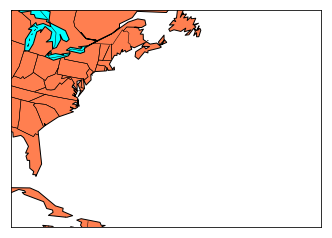

In [14]:
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral',lake_color='aqua')  #We can change these colors if we want to!
# https://matplotlib.org/examples/color/named_colors.html
map.drawstates()
print("done")

We can also add lat/lon grid lines, such as parallels and meridians.
We might want our parallel latitude lines to cover from 80 degrees South to 80 degrees North, and have 10 degree spacing.

In [15]:
parallels = np.arange(-80,81,10) # This creates a numpy array from -80 to 80, with a spacing of 10 degrees
print(parallels)

[-80 -70 -60 -50 -40 -30 -20 -10   0  10  20  30  40  50  60  70  80]


We might want our meridian latitude lines to cover from 180 degrees West to 180 degrees East, and have 10 degree spacing.

In [16]:
meridians = np.arange(-180, 181, 10)

{-90: ([<matplotlib.lines.Line2D at 0x113895710>], []),
 -80: ([<matplotlib.lines.Line2D at 0x113731198>],
  [Text(330000,-50000,'80°W')]),
 -70: ([<matplotlib.lines.Line2D at 0x1137315c0>],
  [Text(1.43e+06,-50000,'70°W')]),
 -60: ([<matplotlib.lines.Line2D at 0x1137319e8>],
  [Text(2.505e+06,-50000,'60°W')]),
 -50: ([<matplotlib.lines.Line2D at 0x113731e10>],
  [Text(3.575e+06,-50000,'50°W')]),
 -40: ([<matplotlib.lines.Line2D at 0x11374c278>],
  [Text(4.675e+06,-50000,'40°W')]),
 -30: ([<matplotlib.lines.Line2D at 0x11374c6a0>], [])}

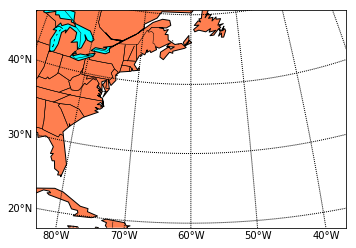

In [17]:
map.drawparallels(parallels, labels = [1,0,0,0], fontsize=10) #These last two commands just specify 
    #where to place the degree labels
map.drawmeridians(meridians, labels = [0, 0, 0, 1], fontsize = 10)

A weird quirk of our map is that it doesn't actually plot with latitude and longitude coordinates. Instead, it has its own "map coordinates," and we have to apply a transform to change our coordinates to this new system. In addition, our latitude and longitude variables are 1D, so we'll use a function called meshgrid to make them into a 2D grid.

In [18]:
lons, lats = np.meshgrid(lon,lat) 
x, y = map(lons, lats)
print(x,y)

[[1483892.09081777 1492975.57296208 1502058.76171577 ... 3497941.62634895
  3507024.42703792 3516107.90918223]
 [1484774.49323459 1493849.99861222 1502925.21324796 ... 3497075.17447614
  3506150.00138778 3515225.50676541]
 [1485657.91625243 1494725.43579148 1503792.66723623 ... 3496207.72014684
  3505274.56420852 3514342.08374757]
 ...
 [1705961.79639679 1713042.66089005 1720123.76658159 ... 3279876.53595731
  3286957.33910995 3294038.20360321]
 [1707090.78190358 1714161.49014549 1721232.44162737 ... 3278767.86047774
  3285838.50985451 3292909.21809642]
 [1708221.08093171 1715281.62135835 1722342.40706219 ... 3277657.89460865
  3284718.37864165 3291778.91906829]] [[ 679838.72358274  679043.04504083  678254.59082451 ...  678254.62435621
   679043.04504083  679838.72358274]
 [ 689860.43050684  689064.42819488  688275.65300996 ...  688275.68655532
   689064.42819487  689860.43050684]
 [ 699880.84889324  699084.52550653  698295.43202358 ...  698295.46558248
   699084.52550653  699880.84889

OK, **now** we can actually start putting our data on the map. To do this, we use a function of the Basemap called pcolor, that plots our data and lets us specify the color.
We can use the default color scheme, or we can change it using the cmap (colormap) function. In this case, I'm going to map everything in gray.

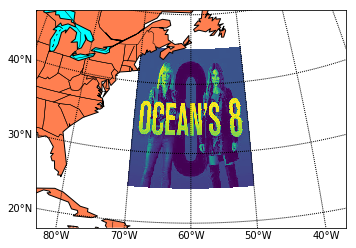

In [19]:
cs = map.pcolor(x,y,np.squeeze(height))

We can also give this map a title and add a colorbar.

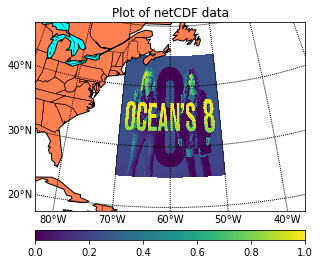

In [20]:
plt.title("Plot of netCDF data")
map.colorbar(cs, location = 'bottom', pad = "10%")
plt.show()

In [21]:
dataset.close()